<a href="https://colab.research.google.com/github/jaekyoungkim/nlp_in_action/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC%EC%9D%B8%EC%95%A1%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/totalgood/nlpia

Cloning into 'nlpia'...
remote: Enumerating objects: 6365, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 6365 (delta 86), reused 132 (delta 55), pack-reused 6176
Receiving objects: 100% (6365/6365), 124.18 MiB | 29.31 MiB/s, done.
Resolving deltas: 100% (4033/4033), done.


In [2]:
!pip install nlpia

     |████████████████████████████████| 32.0 MB 62.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 706 kB 36.7 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 462 kB 60.6 MB/s 
  Created wheel for pypandoc: filename=pypandoc-1.7.4-py2.py3-none-any.whl size=32102 sha256=535179eaf5aa11ddd26e01216c49f2fc41a2190d6ffe18d1c8eb9ad71e3a9426
  Stored in directory: /root/.cache/pip/wheels/f1/80/ba/d10ff9f1ebfd8386979b7d86b7e8ed055aa8bc8f4900bfc986
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149861 sha256=95d35897b453cb3bce72c6734f79a43e2d965d930ce86ded3ab6ca3b2bbb7aa6
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built pypandoc python-Levenshtein


# ch01. 사고의 단위 : nlp개요 

In [ ]:
# 정규식
import re  # regex/re 두개 있음 
r = "(hi|hello|hey)[ ] *([a-z]*)" # a-z에 포함하는 글자가 임의의 횟수로 나타날수 있음

In [ ]:
re.match(r, "hello rosa", flags= re.IGNORECASE)


<re.Match object; span=(0, 10), match='hello rosa'>

In [ ]:
re.match(r, "hi ho, hiho, it's off to work ...", flags= re.IGNORECASE) 


<re.Match object; span=(0, 5), match='hi ho'>

In [ ]:
re.match(r, "hey what's up.", flags= re.IGNORECASE)  # 대소문자 구분 무시함


<re.Match object; span=(0, 8), match='hey what'>

In [ ]:
# code error 
# r = r'[^a-z]*([y]o|[h']?ello|ok|hey|(good[ ])?(morn[gin']{0,3}|'\r'afternoon|even[gin']{0,3}))[\s.;:]{1,3}([a-z]{1,20})'
# r' : 정규 표현식 아니라 원시 문자열을 뜻함


In [ ]:
re_greeting = re.compile(r, flags =re.IGNORECASE) # compile 메서드로 정규표현식을 미리 컴파일해두면 정규식을 적용할때마다 옵션을 지정할 필요 없음

In [ ]:
re_greeting.match('Hello Rosa') 

<re.Match object; span=(0, 10), match='Hello Rosa'>

In [ ]:
re_greeting.match('Good moring Rosa') 

In [ ]:
re_greeting.match('good evening rosa parks')

In [ ]:
my_names = set(['rosa','rose','chatty','chatbot','bot','chatterbot'])
curt_names = set(['hal','you','u']) 
greeter_name ='' #아직 챗봇은 대화상대가 누군지 모름
match = re_greeting.match(input())
if match:
  at_name = match.groups()[-1]
  if at_name in curt_names:
    print('good one')
  elif at_name.lower() in my_names: 
    print('hi {} how are you?'.format(greeter_name)) 


hello rosa
hi  how are you?


In [ ]:
my_names = set(['rosa','rose','chatty','chatbot','bot','chatterbot'])
curt_names = set(['hal','you','u']) 
greeter_name ='' #아직 챗봇은 대화상대가 누군지 모름
match = re_greeting.match(input())
if match:
  at_name = match.groups()[-1]
  if at_name in curt_names:
    print('good one')
  elif at_name.lower() in my_names: 
    print('hi {} how are you?'.format(greeter_name)) 

hello you
good one


In [ ]:
# 부록b의 정규식
# 프로그램 언어로 이루어진 하나의 작은 프로그램
# 문자열을  컴파일해서 하나의 작은 프로그램을 만들고 그것을 다른 문자열들에 대해 실행함으로써 패턴 부합을 수행
# | or
# () 그룹묶기
# [] 문자부류
# \s \b \d \w  흔히쓰이는 문자 부류들의 단축표기
# * ? + 반복횟수 지정
# {7,10} : 반복횟수를 좀더 구체적으로 지정


In [ ]:
import re 
re.findall(r'Hannes|Hobson|Cole', 'Hobson lane, Cole Howard, and Hannes Max Hapke') 


['Hobson', 'Cole', 'Hannes']

In [ ]:
re.findall(r'H|Hobson|Cole', 'Hobson lane, Cole Howard, and Hannes Max Hapke')

['H', 'Cole', 'H', 'H', 'H']

In [ ]:
# () 그룹묶기
# r'(kitt|dogg)y
match = re.match(r'(kitt|dogg)y' , "doggy") 

In [ ]:
match.group()

'doggy'

In [ ]:
match.group(0)

'doggy'

In [ ]:
match.groups()

('dogg',)

In [ ]:
match = re.match(r'((kitt|dogg)(y))',  "doggy") # 괄호를 더 추가해서 전체 부합과 접미사도 개별적인 그룹으로 묶기


In [ ]:
match.groups()

('doggy', 'dogg', 'y')

In [ ]:
match.group(3)

'y'

In [ ]:
# [ ] 문자부류
# [abcd] : a or b or c or d
# [a-d] : a-d
# [a-c1-3] : [abc123] 


In [ ]:
from collections import Counter  # counter : 토큰들을 각각의 통으로 분류하고 그 개수를 세는 기능 제공 
Counter('guten morgen rosa'.split())

Counter({'guten': 1, 'morgen': 1, 'rosa': 1})

In [ ]:
from itertools import permutations
[" ".join(combo) for combo in permutations("good morning rosa!".split(),3)]

['good morning rosa!',
 'good rosa! morning',
 'morning good rosa!',
 'morning rosa! good',
 'rosa! good morning',
 'rosa! morning good']

In [ ]:
#  단어 순서가 중요한 좀더 길고 복잡한 문장
s = """find textbooks with titles containing nlp or natural and language or computational and linguistics."""
len(set(s.split()))

12

In [ ]:
import numpy as np
np.arange(1, 12+1).prod()  # factorial(12)
# sapcy, syntaxnet: 자연어 문장에서 구문적, 놀리적 관계를 추출하게 해줌


479001600

In [ ]:
# 챗봇을 만들기 위한 알고리즘
# 1. 파싱 :텍스트에서 특징들과 구조적 수치자료를 추출
# 2. 분석 : 정서, 문법성, 으미론에 대한 평점
# 3. 생성 : 적절한 응답문 작성
# 4, 실행

# ch02. 나만의 어취 구축 : 단어 토큰화 

In [ ]:
# 토큰 : 문자열을 개별적인 의미 단위들로 분할하는 방법을 적용한 단위 
# we'll -> we will로 구분할 수 있어야함
# 토큰생성기를 이용한 어휘구축
# 컴퓨터 언어로된 소스코드를 토크화하는데 쓰이는 토큰 생성기 :  스캐너, 렉서(lexical analyzer) 
# 어휘집 , 파서(컴파일러), 토큰, 용어, 단어, n그램 등의 용어들이 사용됨
# 토큰화는 구조가 없는 자료인 자연어 텍스트를 정보 조각들로 분할함


In [ ]:
sentence = '''thomas jefferson began building monticello at the age of 26.'''
sentence.split()

['thomas',
 'jefferson',
 'began',
 'building',
 'monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

In [ ]:
str.split(sentence)

['thomas',
 'jefferson',
 'began',
 'building',
 'monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

In [ ]:
token_sequence = str.split(sentence)
vocab = sorted(set(token_sequence))
', '.join(vocab)

'26., age, at, began, building, jefferson, monticello, of, the, thomas'

In [ ]:
num_tokens = len(token_sequence) ;num_tokens

10

In [ ]:
vocab_size = len(vocab) ; vocab_size

10

In [ ]:
onehot_vectors = np.zeros((num_tokens, vocab_size), int) ;onehot_vectors

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
for i , word in enumerate(token_sequence):
  onehot_vectors[i, vocab.index(word)] = 1
  

In [ ]:
' '.join(vocab)

'26. age at began building jefferson monticello of the thomas'

In [ ]:
onehot_vectors

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
import pandas as pd
pd.DataFrame(onehot_vectors, columns = vocab)

,26.,age,at,began,building,jefferson,monticello,of,the,thomas
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame(onehot_vectors, columns = vocab)

In [ ]:
df[df==0] = ''

In [ ]:
df

,26.,age,at,began,building,jefferson,monticello,of,the,thomas
0,,,,,,,,,,1
1,,,,,,1,,,,
2,,,,1,,,,,,
3,,,,,1,,,,,
4,,,,,,,1,,,
5,,,1,,,,,,,
6,,,,,,,,,1,
7,,1,,,,,,,,
8,,,,,,,,1,,
9,1,,,,,,,,,


In [ ]:
# 장점은 어떤 정보도 소실되지 않지만 복원할때도 완벽함
# 원문의 모든 세부사항을 유지함, 컴퓨터가 이해할 수 있는 수치자료의 형태임
# 단어 모음 벡터(빈도벡터) : 단어의 순서 안나타나기때문에 복원 불가능

In [ ]:
sentence_bow = {}
for token in sentence.split():
  sentence_bow[token] = 1
  sorted(sentence_bow.items())

In [ ]:
sentence_bow

{'26.': 1,
 'age': 1,
 'at': 1,
 'began': 1,
 'building': 1,
 'jefferson': 1,
 'monticello': 1,
 'of': 1,
 'the': 1,
 'thomas': 1}

In [ ]:
import pandas as pd
df = pd.DataFrame( pd.Series(dict([(token,1) for token in sentence.split()])), columns=['sent']).T

In [ ]:
[(token,1) for token in sentence.split()]

[('thomas', 1),
 ('jefferson', 1),
 ('began', 1),
 ('building', 1),
 ('monticello', 1),
 ('at', 1),
 ('the', 1),
 ('age', 1),
 ('of', 1),
 ('26.', 1)]

In [ ]:
df

,thomas,jefferson,began,building,monticello,at,the,age,of,26.
sent,1,1,1,1,1,1,1,1,1,1


In [ ]:
sentences = """thomas jefferson began building moticello at the age of 26.\n"""
sentences += """construction was done mostly by local masons and carpenters.\n"""
sentences += """he moved into the south pavilion in 1770.\n"""
sentences += """turning moticello into a neoclassical masterpiece was jefferson's obsession."""
corpus ={}
print(sentences)

thomas jefferson began building moticello at the age of 26.
construction was done mostly by local masons and carpenters.
he moved into the south pavilion in 1770.
turning moticello into a neoclassical masterpiece was jefferson's obsession.


In [ ]:
for i, sent in enumerate(sentences.split('\n')):
  corpus['sent{}'.format(i)] = dict((tok,1) for tok in sent.split())

In [ ]:
corpus

{'sent0': {'26.': 1,
  'age': 1,
  'at': 1,
  'began': 1,
  'building': 1,
  'jefferson': 1,
  'moticello': 1,
  'of': 1,
  'the': 1,
  'thomas': 1},
 'sent1': {'and': 1,
  'by': 1,
  'carpenters.': 1,
  'construction': 1,
  'done': 1,
  'local': 1,
  'masons': 1,
  'mostly': 1,
  'was': 1},
 'sent2': {'1770.': 1,
  'he': 1,
  'in': 1,
  'into': 1,
  'moved': 1,
  'pavilion': 1,
  'south': 1,
  'the': 1},
 'sent3': {'a': 1,
  'into': 1,
  "jefferson's": 1,
  'masterpiece': 1,
  'moticello': 1,
  'neoclassical': 1,
  'obsession.': 1,
  'turning': 1,
  'was': 1}}

In [ ]:
df =pd.DataFrame.from_records(corpus).fillna(0).astype(int).T
df[df.columns[:10]]

,thomas,jefferson,began,building,moticello,at,the,age,of,26.
sent0,1,1,1,1,1,1,1,1,1,1
sent1,0,0,0,0,0,0,0,0,0,0
sent2,0,0,0,0,0,0,1,0,0,0
sent3,0,0,0,0,1,0,0,0,0,0


In [ ]:
# 내적
v1 = pd.np.array([1,2,3]) 
v2 = pd.np.array([2,3,4]) 
(v1*v2).sum() # 굉장히 효율적인 계산

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


20

In [ ]:
sum([x1 * x2 for x1, x2 in zip(v1,v2)])

20

In [ ]:
v1

array([1, 2, 3])

In [ ]:
v1.reshape(-1,1).T

array([[1, 2, 3]])

In [ ]:
v2.reshape(-1,1)

array([[2],
       [3],
       [4]])

In [ ]:
v1.reshape(-1,1).T@v2.reshape(-1,1) # @ : 행렬곱 연산자

array([[20]])

In [ ]:
# 중복단어 개수세기
df = df.T
df.sent0.dot(df.sent1)

0

In [ ]:
df.sent0.dot(df.sent2)

1

In [ ]:
df.sent0.dot(df.sent3)

1

In [ ]:
# 내적이 1이되게한 단어를 찾기
[(k,v) for (k,v) in (df.sent0 & df.sent3).items() if v] 

[('moticello', 1)]

In [ ]:
(df.sent0 & df.sent3).items() 

In [ ]:
(df.sent0 & df.sent3)

thomas          0
jefferson       0
began           0
building        0
moticello       1
at              0
the             0
age             0
of              0
26.             0
construction    0
was             0
done            0
mostly          0
by              0
local           0
masons          0
and             0
carpenters.     0
he              0
moved           0
into            0
south           0
pavilion        0
in              0
1770.           0
turning         0
a               0
neoclassical    0
masterpiece     0
jefferson's     0
obsession.      0
dtype: int64

In [ ]:
import re 
sentence = """thomas jefferson began building moticello at the age of 26."""
tokens = re.split(r'[-\s.,;!?]+' , sentence) # 공백이나 몇가지 문장부호를 기준으로 분할함
tokens

#  정규식 파헤치기
# [] : 대괄호는 주어진 텍스트가 부합해야할 문자들의 집합을 지정함
# + : []다음 나오는 + , 주어진 문자 부류의 문자들이 하나이상 부합해야함을 뜻함
# \s : \\t\n\r\f\v 등의 공백문자들을 대표함
# \t 탭
# \r 캐리지 리턴
# \n 새줄
# \f 폼피드
# \v 수직탭 문자
# r'[a-z] , r'[0-9], r'[_a-zA-Z] : 밑줄문자나 영문소문자, 대문자와 부합함
# [-] : 정규 표현식의 까다로운 규칙에 해당함


['thomas',
 'jefferson',
 'began',
 'building',
 'moticello',
 'at',
 'the',
 'age',
 'of',
 '26',
 '']

In [ ]:
# 단어 분리를 위한 정규 표현식 개선
pattern = re.compile(r'([-\s.,;:!?])+')
tokens = pattern.split(sentence) 
tokens[-10:]

[' ', 'the', ' ', 'age', ' ', 'of', ' ', '26', '.', '']

In [ ]:
sentence = """thomas jefferson began building moticello at the age of 26."""
pattern = re.compile(r'([-\s.,;:!?])+')
tokens = pattern.split(sentence) 
[x for x in tokens if x and x not in '- \t\n.,;!?']

['thomas',
 'jefferson',
 'began',
 'building',
 'moticello',
 'at',
 'the',
 'age',
 'of',
 '26']

In [ ]:
# regex : 부합집합중첩, 다중 스레드 적용 유니코드 완벽지원, 근사 정규 표현식 부합, 더큰  maxcache(500개)

In [ ]:
# 주요 토큰화 라이브러리 
# spacy : 정확,유연, 빠름, 파이썬
# coreNLP : 스탠퍼드, 더욱 정확하지만 덜 유연, 빠름, JAVA8에 의존
# NLTK : 표준 라이브러리, 유명, 파이썬


In [ ]:
from nltk.tokenize import RegexpTokenizer 
tokenizer = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')
tokenizer.tokenize(sentence)

['thomas',
 'jefferson',
 'began',
 'building',
 'moticello',
 'at',
 'the',
 'age',
 'of',
 '26',
 '.']

In [ ]:
# 좀더 강력한 토큰화 함수 :  treebandwordtokenizer, 소숫점, 축양형도 토큰화 가능
from nltk.tokenize import TreebankWordTokenizer
sentence = """Monticello wasn't designated as UNESCO World heritage site until 1987."""
tokenizer = TreebankWordTokenizer()

In [ ]:
tokenizer.tokenize(sentence)

['Monticello',
 'was',
 "n't",
 'designated',
 'as',
 'UNESCO',
 'World',
 'heritage',
 'site',
 'until',
 '1987',
 '.']

In [ ]:
# n-gram을 활용한 어휘 확장
#tokenize_2grams(sentence)

In [ ]:
from nltk.util import ngrams
tokens = [x for x in tokens if x and x not in '= \t\n.,;:!?']

list(ngrams(tokens,2))

[('thomas', 'jefferson'),
 ('jefferson', 'began'),
 ('began', 'building'),
 ('building', 'moticello'),
 ('moticello', 'at'),
 ('at', 'the'),
 ('the', 'age'),
 ('age', 'of'),
 ('of', '26')]

In [ ]:
list(ngrams(tokens,3))

[('thomas', 'jefferson', 'began'),
 ('jefferson', 'began', 'building'),
 ('began', 'building', 'moticello'),
 ('building', 'moticello', 'at'),
 ('moticello', 'at', 'the'),
 ('at', 'the', 'age'),
 ('the', 'age', 'of'),
 ('age', 'of', '26')]

In [ ]:
two_grams = list(ngrams(tokens,2))
[" ".join(x) for x in two_grams]


['thomas jefferson',
 'jefferson began',
 'began building',
 'building moticello',
 'moticello at',
 'at the',
 'the age',
 'age of',
 'of 26']

In [ ]:
stop_words = ['a','an','the','on','of','off','this','is']
tokens = ['the','house','is','on','fire'] 
tokens_without_stopwords = [x for x in tokens if x not in stop_words] 
tokens_without_stopwords

['house', 'fire']

In [ ]:
# nltk의 불용어 목록
import nltk
nltk.download('stopwords') 
stop_words = nltk.corpus.stopwords.words('english')
len(stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [ ]:
stop_words[:7]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours']

In [ ]:
# 여러 불용어 집합을 같이 사용하기
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words 
len(sklearn_stop_words)

318

In [ ]:
len(stop_words)

179

In [ ]:
# len(stop_words.union(sklearn_stop_words))

In [ ]:
# len(stop_words.intersection(sklearn_stop_words))

In [ ]:
tokens = ['House','Visitors','Center'] 
normalized_tokens = [x.lower() for x in tokens] 
print(normalized_tokens)

['house', 'visitors', 'center']


In [ ]:
# 정규화 : 재현율을 높여주지만, 정밀도를 낮춤
# 별로 관심없는 문서들이 검색결과에 포함될 가능성 생김
# 검색엔진을 위한 파이프라인을 구축할때는 두종류의 검색어에 맞는 두종류의 색인을 구축 (정규화 o/x)


In [ ]:
# 어간 추출(stemming)
# 영어의 어간추출은 단어들에서 접미사를 제거함으로써 의미가 비슷한 단어들을 하나의 공통어간으로 묶음
# 어간이 반드시 영어사전에 나오는 정확한 철자의 단어일 필요없음
# 어간추출은 문서에 담긴 정보와 의미를 최대한 유지하면서 어휘의 크기를 줄이는 방법
def stem(phrase):
  return ' '.join([re.findall('^(.*ss|.*?)(s)?$', word)[0][0].strip("'") for word in phrase.lower().split()])

  # 만일 단어가 하나의 s로 끝나면 어간은 단어에서 s를 제외한 부분이고 접미사는 S이다
  # 만일 단어가 s로 끝나지 않으면 어간은 그 단어 자체이고 접미사는 없다


In [ ]:
stem('houses')

'house'

In [ ]:
stem("Doctor House's calls")

'doctor house call'

In [ ]:
# 어간추출기
from nltk.stem.porter import PorterStemmer 
stemmer = PorterStemmer() 
' '.join([stemmer.stem(w).strip("'") for w in "dish washer's washed dishes".split()])

'dish washer wash dish'

In [ ]:
# 표제어 추출 (lemmatization) 
# 어근수준으로 내려가서 정규화하는것
# 차원축소를 하게 하지만 모형이 덜 정확해지는 단점이 있음
# 뿌리가 같지만 의미가 완전히 같지는 않은 여러 철자변형을 모두 같은 단어로 간주함
# chat, chatter, chatty, chatting을 똑같이 취급
# 단어의 의미를 고려해서 단어들을 정규화한다는 점에서 표제어 추출은 어간추출이나 대소문자 정규화보다 좀더 정확한 정규화 방법이라 할 수있음


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("better")  # 명사로 판단

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


'better'

In [ ]:
lemmatizer.lemmatize("better",pos="a") 

'good'

In [ ]:
lemmatizer.lemmatize("goods", pos="n") 

'good'

In [ ]:
lemmatizer.lemmatize("goods", pos="a") 

'goods'

In [ ]:
lemmatizer.lemmatize("best", pos="a") 

'best'

In [ ]:
# 일반적으로 어간 추출이 표제어 추출보다 더 빠르고 필요한 코드와 자료집합도 덜 복잡함
# 둘다 어휘의 크기를 줄이는 대신 텍스트의 중의성을 높인다.


In [ ]:
# 감정분석
# VADER알고리즘이 사용되곤함
# 규칙 기반 감정 분석기
# Valence aware dictionary for sentiment reasoning 
# nltk.sentiment.vader 로 사용가능함
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     |████████████████████████████████| 125 kB 4.1 MB/s 


In [ ]:
sa = SentimentIntensityAnalyzer()


In [ ]:
sa.lexicon # 토큰 감정 점수 쌍들이 들어있음

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [ ]:
sa.polarity_scores(text={':(': -1.9, ':)': 2.0})

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
[(tok, score) for tok, score in sa.lexicon.items() if " " in tok] # 7500개 정의된것 중에서 빈칸이 포함된것은 세개뿐

[("( '}{' )", 1.6),
 ("can't stand", -2.0),
 ('fed up', -1.8),
 ('screwed up', -1.5)]

In [ ]:
sa.polarity_scores(text="python is very readable and it's great for NLP.")

{'compound': 0.6249, 'neg': 0.0, 'neu': 0.661, 'pos': 0.339}

In [ ]:
sa.polarity_scores(text="Python is not a bad choice for most applications")

{'compound': 0.431, 'neg': 0.0, 'neu': 0.737, 'pos': 0.263}

In [ ]:
corpus = ["absolutely perfect love it :-) :-) :-)",
          "horrible! completely useless. :(",
          "it was ok some good and some bad things"
          ]
for doc in corpus:
  scores=sa.polarity_scores(doc)
  print('{:+}:{}'.format(scores['compound'], doc))

+0.9368:absolutely perfect love it :-) :-) :-)
-0.8768:horrible! completely useless. :(
+0.1531:it was ok some good and some bad things


In [ ]:
# vader의 단점은 모든 단어가 아니라 약 7500개 단어만 고려한다는것


In [ ]:
# 단순 베이즈 모
# 감정 분석의 경우 목표변수는 평가하고자 하는 감정
# VADER처럼 규칙기반 감정분석기와는 달리 사람이 개별 단어들에 대해 일일이 감정 점수를 지정해 둘 필요가 없음
# 임의의 문제에 대해 최선의 감정점수를 찾아냄
# 언어모델을 사용해 문장생성을 수행


In [ ]:
from nlpia.loaders import get_data

/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/usr/local/lib/python3.7/dist-packages/pugnlp/tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/pugnlp/util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/nlpia

In [ ]:
movies =get_data("hutto_movies")
movies.head().round(2)

,sentiment,text
id,,
1,2.27,The Rock is destined to be the 21st Century's ...
2,3.53,The gorgeously elaborate continuation of ''The...
3,-0.60,Effective but too tepid biopic
4,1.47,If you sometimes like to go to the movies to h...
5,1.73,"Emerges as something rare, an issue movie that..."


In [ ]:
import pandas as pd
pd.set_option('display.width', 75)  # dataframe의 내용이 좀더 보기좋게 변함
from nltk.tokenize import casual_tokenize # 이모티콘과 비표준적인 문장부호, 비속어를 더 잘처리함
bags_of_words = []
from collections import Counter
for text in movies.text:
  bags_of_words.append(Counter(casual_tokenize(text))) 



In [ ]:
df_bows = pd.DataFrame.from_records(bags_of_words) 


In [ ]:
df_bows = df_bows.fillna(0).astype(int)

df_bows.shape

(10605, 20756)

In [ ]:
df_bows.head()

,The,Rock,is,destined,to,be,the,21st,Century's,new,...,Ill,slummer,Rashomon,dipsticks,Bearable,Staggeringly,’,ve,muttering,dissing
0,1,1,1,1,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_bows.head()[list(bags_of_words[0].keys())]

,The,Rock,is,destined,to,be,the,21st,Century's,new,...,Schwarzenegger,",",Jean,Claud,Van,Damme,or,Steven,Segal,.
0,1,1,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,4,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# 베이즈 모델을 활용한 감정분석
from sklearn.naive_bayes import MultinomialNB 
nb = MultinomialNB()
nb = nb.fit(df_bows, movies.sentiment > 0) 
nb

MultinomialNB()

In [ ]:
movies.sentiment > 0

id
1         True
2         True
3        False
4         True
5         True
         ...  
10601    False
10602    False
10603    False
10604     True
10605    False
Name: sentiment, Length: 10605, dtype: bool

In [ ]:
movies

,sentiment,text
id,,
1,2.266667,The Rock is destined to be the 21st Century's ...
2,3.533333,The gorgeously elaborate continuation of ''The...
3,-0.600000,Effective but too tepid biopic
4,1.466667,If you sometimes like to go to the movies to h...
5,1.733333,"Emerges as something rare, an issue movie that..."
...,...,...
10601,-0.062500,Well made but mush hearted.
10602,-1.500000,A real snooze.
10603,-0.625000,No surprises.


In [ ]:
df_bows

,The,Rock,is,destined,to,be,the,21st,Century's,new,...,Ill,slummer,Rashomon,dipsticks,Bearable,Staggeringly,’,ve,muttering,dissing
0,1,1,1,1,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10603,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,2,1,0,0


In [ ]:
movies['predicted_sentiment'] = nb.predict_proba(df_bows)[:,1] * 8 -4 

In [ ]:
nb.predict_proba(df_bows) * 8 -4

array([[-2.51151475,  2.51151475],
       [-3.9999042 ,  3.9999042 ],
       [ 3.655976  , -3.655976  ],
       ...,
       [ 1.48144924, -1.48144924],
       [-3.98898791,  3.98898791],
       [ 3.99795422, -3.99795422]])

In [ ]:
movies.head()

,sentiment,text,predicted_sentiment
id,,,
1,2.266667,The Rock is destined to be the 21st Century's ...,2.511515
2,3.533333,The gorgeously elaborate continuation of ''The...,3.999904
3,-0.600000,Effective but too tepid biopic,-3.655976
4,1.466667,If you sometimes like to go to the movies to h...,1.940954
5,1.733333,"Emerges as something rare, an issue movie that...",3.910373


In [ ]:
movies['error'] = (movies.predicted_sentiment - movies.sentiment).abs()

In [ ]:
movies.error.mean()

1.869883754974617

In [ ]:
movies['sentiment_ispositive'] = (movies.sentiment>0).astype(int) 
movies['predicted_ispositive'] = (movies.predicted_sentiment >0).astype(int)
movies['''sentiment predicted_sentiment sentiment_ispositive predicted_ispositive'''.split()].head(8) 


,sentiment,predicted_sentiment,sentiment_ispositive,predicted_ispositive
id,,,,
1,2.266667,2.511515,1,1
2,3.533333,3.999904,1,1
3,-0.600000,-3.655976,0,0
4,1.466667,1.940954,1,1
5,1.733333,3.910373,1,1
6,2.533333,3.995188,1,1
7,2.466667,3.960466,1,1
8,1.266667,-1.918701,1,0


In [ ]:
(movies.predicted_ispositive == movies.sentiment_ispositive).sum() / len(movies)
# 긍정적 추천평가는 93%경우에 정확

0.9344648750589345

In [ ]:
products = get_data("hutto_products")
bags_of_words = []
for text in products.text:
  bags_of_words.append(Counter(casual_tokenize(text)))
  

In [ ]:
df_product_bows = pd.DataFrame.from_records(bags_of_words) 


In [ ]:
df_product_bows = df_product_bows.fillna(0).astype(int)

In [ ]:
df_product_bows

,troubleshooting,ad,-,2500,and,2600,no,picture,scrolling,b,...,undone,warrranty,expire,expired,voids,develops,soldier,serving,baghdad,harddisk
0,1,2,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3543,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_all_bows = df_bows.append(df_product_bows); df_all_bows

,The,Rock,is,destined,to,be,the,21st,Century's,new,...,sligtly,owner,81,defectively,warrranty,expire,expired,voids,baghdad,harddisk
0,1.0,1.0,1,1.0,2,1,1,1,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,0.0,1,0.0,0,0,1,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0,0.0,0,0,0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1,0.0,4,0,1,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0,0.0,0,0,0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,NaN,NaN,0,NaN,1,0,1,0,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3542,NaN,NaN,0,NaN,0,0,0,0,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3543,NaN,NaN,0,NaN,0,0,2,0,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3544,NaN,NaN,0,NaN,0,0,0,0,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_all_bows.columns # 영화평 말뭉치를 상품평에 적용하기

Index(['The', 'Rock', 'is', 'destined', 'to', 'be', 'the', '21st',
       'Century's', 'new',
       ...
       'sligtly', 'owner', '81', 'defectively', 'warrranty', 'expire',
       'expired', 'voids', 'baghdad', 'harddisk'],
      dtype='object', length=23302)

In [ ]:
df_all_bows= df_all_bows.fillna(0).astype(int)

In [ ]:
df_products_bows = df_all_bows.iloc[len(movies):][df_bows.columns] 

In [ ]:
df_products_bows

,The,Rock,is,destined,to,be,the,21st,Century's,new,...,Ill,slummer,Rashomon,dipsticks,Bearable,Staggeringly,’,ve,muttering,dissing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3543,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_products_bows.shape

(3546, 20756)

In [ ]:
products['ispos'] = (products.sentiment > 0).astype(int) 
products['predicted_ispositive'] = nb.predict(df_products_bows.values).astype(int) 
products.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


,id,sentiment,text,ispos,predicted_ispositive
0,1_1,-0.90,troubleshooting ad-2500 and ad-2600 no picture...,0,0
1,1_2,-0.15,"repost from january 13, 2004 with a better fit...",0,0
2,1_3,-0.20,does your apex dvd player only play dvd audio ...,0,0
3,1_4,-0.10,or does it play audio and video but scrolling ...,0,0
4,1_5,-0.50,before you try to return the player or waste h...,0,0


In [ ]:
df_product_bows.values

array([[1, 2, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
products

,id,sentiment,text,ispos,predicted_ispositive
0,1_1,-0.90,troubleshooting ad-2500 and ad-2600 no picture...,0,0
1,1_2,-0.15,"repost from january 13, 2004 with a better fit...",0,0
2,1_3,-0.20,does your apex dvd player only play dvd audio ...,0,0
3,1_4,-0.10,or does it play audio and video but scrolling ...,0,0
4,1_5,-0.50,before you try to return the player or waste h...,0,0
...,...,...,...,...,...
3541,309_4,-1.80,"the other day when i was listening to a song, ...",0,0
3542,309_5,-1.30,it says i have a harddisk problem.,0,0
3543,309_6,-1.95,and since i'm out here i can't mail it back un...,0,0
3544,309_7,0.45,it worked good for a while.,1,0


In [ ]:
(products.predicted_ispositive == products.ispos).sum() / len(products)

0.5572476029328821

# ch03. 말잘하는 수학 : TF-IDF 벡터 

In [ ]:
# 1. 단어모음 : 단어빈도들의 벡터
# 2. n-그램 모음 
# 3. TF-IDF 벡터 : 단어의 중요도를 좀더 잘 표현하는 단어 점수 벡터
# -> 통계에 기초한다는 점에서 모두 통계적 모형에 해당

In [ ]:
!pip install nltk

In [ ]:
# 단어 모음
from nltk.tokenize import TreebankWordTokenizer 
sentence = """ the faster harry got to the store, the faster harry, the faster, would get home."""
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(sentence.lower())

In [ ]:
tokens

['the',
 'faster',
 'harry',
 'got',
 'to',
 'the',
 'store',
 ',',
 'the',
 'faster',
 'harry',
 ',',
 'the',
 'faster',
 ',',
 'would',
 'get',
 'home',
 '.']

In [ ]:
from collections import Counter
bag_of_words = Counter(tokens) 
bag_of_words

Counter({',': 3,
         '.': 1,
         'faster': 3,
         'get': 1,
         'got': 1,
         'harry': 2,
         'home': 1,
         'store': 1,
         'the': 4,
         'to': 1,
         'would': 1})

In [ ]:
bag_of_words.most_common(4)

[('the', 4), ('faster', 3), (',', 3), ('harry', 2)]

In [ ]:
times_harry_appears = bag_of_words['harry']
num_unique_words = len(bag_of_words) 
num_unique_words

11

In [ ]:
tf = times_harry_appears / num_unique_words;tf

0.18181818181818182

In [ ]:
from nlpia.data.loaders import kite_text

/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/usr/local/lib/python3.7/dist-packages/pugnlp/tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/pugnlp/util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/nlpia

In [ ]:
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(kite_text.lower())
token_counts = Counter(tokens) 
token_counts

Counter({"'s": 2,
         '(': 1,
         ')': 1,
         ',': 15,
         '.': 2,
         ';': 2,
         'a': 20,
         'above': 1,
         'activities': 1,
         'aerial': 1,
         'against': 1,
         'air': 2,
         'along': 1,
         'also': 3,
         'anchor': 1,
         'anchors': 1,
         'anchors.': 2,
         'and': 10,
         'angle': 1,
         'apply': 1,
         'are': 3,
         'around': 1,
         'art': 1,
         'as': 5,
         'at': 3,
         'attached.': 1,
         'ballet': 1,
         'balloon': 1,
         'be': 5,
         'been': 1,
         'below': 1,
         'boat': 1,
         'both': 1,
         'bridle': 2,
         'buggying': 1,
         'by': 2,
         'called': 2,
         'can': 3,
         'competition.': 1,
         'components': 1,
         'comprising': 1,
         'consists': 2,
         'correct': 1,
         'craft': 2,
         'create': 1,
         'designed': 2,
         'different': 1,
      

In [ ]:
# 불용어 제거
import nltk 
nltk.download('stopwords', quiet=True)

True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english') 
tokens = [ x for x in tokens if x not in stopwords]
kite_tokens = Counter(tokens) 
kite_tokens

Counter({"'s": 2,
         '(': 1,
         ')': 1,
         ',': 15,
         '.': 2,
         ';': 2,
         'activities': 1,
         'aerial': 1,
         'air': 2,
         'along': 1,
         'also': 3,
         'anchor': 1,
         'anchors': 1,
         'anchors.': 2,
         'angle': 1,
         'apply': 1,
         'around': 1,
         'art': 1,
         'attached.': 1,
         'ballet': 1,
         'balloon': 1,
         'boat': 1,
         'bridle': 2,
         'buggying': 1,
         'called': 2,
         'competition.': 1,
         'components': 1,
         'comprising': 1,
         'consists': 2,
         'correct': 1,
         'craft': 2,
         'create': 1,
         'designed': 2,
         'different': 1,
         'direction': 1,
         'drag': 2,
         'drag.': 1,
         'e.g.': 1,
         'even': 2,
         'face': 1,
         'festivals': 1,
         'fishing': 1,
         'fixed': 1,
         'flight': 1,
         'flow': 1,
         'flown': 3,
 

In [ ]:
# 단어 빈도를 벡터로 만들기
document_vector  = []
doc_length = len(tokens) 
for key, value in kite_tokens.most_common():
  document_vector.append(value/ doc_length) 


In [ ]:
document_vector

[0.07207207207207207,
 0.06756756756756757,
 0.036036036036036036,
 0.02252252252252252,
 0.018018018018018018,
 0.018018018018018018,
 0.013513513513513514,
 0.013513513513513514,
 0.013513513513513514,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.

In [ ]:
docs = ["the faster harry got to the store, the faster harry, the faster, would get home."]
docs.append("harry is hairy and faster than jill.")
docs.append("jill is not as hairy as harry.")
docs

['the faster harry got to the store, the faster harry, the faster, would get home.',
 'harry is hairy and faster than jill.',
 'jill is not as hairy as harry.']

In [ ]:
doc_tokens= []
for doc in docs :
  doc_tokens += [ sorted(tokenizer.tokenize(doc.lower()))] 
doc_tokens

[[',',
  ',',
  ',',
  '.',
  'faster',
  'faster',
  'faster',
  'get',
  'got',
  'harry',
  'harry',
  'home',
  'store',
  'the',
  'the',
  'the',
  'the',
  'to',
  'would'],
 ['.', 'and', 'faster', 'hairy', 'harry', 'is', 'jill', 'than'],
 ['.', 'as', 'as', 'hairy', 'harry', 'is', 'jill', 'not']]

In [ ]:
len(doc_tokens[0])

19

In [ ]:
all_doc_tokens = sum(doc_tokens,[]) ;all_doc_tokens
len(all_doc_tokens)

35

In [ ]:
lexicon = sorted(set(all_doc_tokens)) 
len(lexicon)


18

In [ ]:
from collections import OrderedDict 
zero_vector = OrderedDict((token,0) for token in lexicon) 
zero_vector

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

In [ ]:
len(lexicon) 

18

In [ ]:
docs

['the faster harry got to the store, the faster harry, the faster, would get home.',
 'harry is hairy and faster than jill.',
 'jill is not as hairy as harry.']

In [ ]:
import copy 
doc_vectors = []
for doc in docs : 
  vec = copy.copy(zero_vector) # 주어진 벡터를 복사해서 그 벡터와는 독립적인 벡터를 생성 참조를 해서 재사용하는 것이 아니라 새로운 벡터를 생성
  tokens = tokenizer.tokenize(doc.lower()) 
  token_counts = Counter(tokens) 
  for key, value in token_counts.items():
    vec[key] = value / len(lexicon)  # len(lexicon) = 18
  doc_vectors.append(vec)

In [ ]:
doc_vectors

[OrderedDict([(',', 0.16666666666666666),
              ('.', 0.05555555555555555),
              ('and', 0),
              ('as', 0),
              ('faster', 0.16666666666666666),
              ('get', 0.05555555555555555),
              ('got', 0.05555555555555555),
              ('hairy', 0),
              ('harry', 0.1111111111111111),
              ('home', 0.05555555555555555),
              ('is', 0),
              ('jill', 0),
              ('not', 0),
              ('store', 0.05555555555555555),
              ('than', 0),
              ('the', 0.2222222222222222),
              ('to', 0.05555555555555555),
              ('would', 0.05555555555555555)]),
 OrderedDict([(',', 0),
              ('.', 0.05555555555555555),
              ('and', 0.05555555555555555),
              ('as', 0),
              ('faster', 0.05555555555555555),
              ('get', 0),
              ('got', 0),
              ('hairy', 0.05555555555555555),
              ('harry', 0.05555555555555555),
 

In [ ]:
# 벡터공간 : 그 공간안에 나타날 수 있는 모든 가능한 벡터의 집합, 벡터의 성분개수는 해당 벡터 공간의 차원수 
# 코사인 유사도,  두벡터의 거리 대신 각도에 기초해서 두벡터의 유사도를 측정, 유클리드 내적 공식에서 유도
# a.dot(b) ==np.linalg.nom(a) * np.linalg.norm(b) / np.cos(theta) 

In [ ]:
import math 
def cosine_sim(vec1,vec2):
  """두 문서 표현 벡터의 코사인 유사도를 계산하는 함수"""
  vec1= [val for val in vec1.values()] 
  vec2= [val for val in vec2.values()] 
  dot_prod = 0
  for i, v in enumerate(vec1):  # 곱한것들의 합
    dot_prod += v*vec2[i] 
  
  mag_1 = math.sqrt(sum([x**2 for x in vec1])) # norm(a)
  mag_2 = math.sqrt(sum([x**2 for x in vec2])) # norm(b)
  return dot_prod / (mag_1*mag_2)
# 코사인유사도1 : 길이는 다를수있지만 방향은 정확히 일치함을 의미. 두 문서의 유사도가 1이면 비슷한 내용을 담고있을 가능성이 크다
# tf벡터는 같은 사분면에 있다. 그러나 코사인 유사도가 음수가 되려면 두벡터 중 하나가 다른 사분면에 있어야하는데 tf벡터는 모든성분이 양수이기에 불가능


In [ ]:
# 지프의 법칙 
# 어떠한 자연어 말뭉치 표현에 나타나는 단어들을 그 사용빈도가 높은 순서대로 나열했을때, 모든 단어의 사용빈도는 해당 단어의 순위에 반비례함

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
from nltk.corpus import brown

In [ ]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [ ]:
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [ ]:
brown.tagged_words()[:5] # 품사 태깅을 보여줌

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL')]

In [ ]:
len(brown.words()) # 100만을 넘는 단어 존재함


1161192

In [ ]:
from collections import Counter  
puncs = set((',','.','--','-','!','?',':',';', '(', ')','[', ']','``',"''" ))

In [ ]:
word_list = (x.lower() for x in brown.words() if x not in puncs)

In [ ]:
token_counts = Counter(word_list) 

In [ ]:
token_counts.most_common(20)

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164)]

In [ ]:
# 주제 모형화
# idf : 역문서빈도, 지프의 법칙을 주제 분석에 적용하는 수단이라 할 수 있음

In [ ]:
!pip install nlpia

     |████████████████████████████████| 32.0 MB 1.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 706 kB 62.0 MB/s 
     |████████████████████████████████| 50 kB 5.0 MB/s 
     |████████████████████████████████| 462 kB 46.9 MB/s 
  Created wheel for pypandoc: filename=pypandoc-1.7.4-py2.py3-none-any.whl size=32102 sha256=535179eaf5aa11ddd26e01216c49f2fc41a2190d6ffe18d1c8eb9ad71e3a9426
  Stored in directory: /root/.cache/pip/wheels/f1/80/ba/d10ff9f1ebfd8386979b7d86b7e8ed055aa8bc8f4900bfc986
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149878 sha256=78e250ff9c9abec67c42b858c9ae357a59f69814d943cd4513c7470e338a2582
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built pypandoc python-Levenshtein


In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

from nlpia.data.loaders import kite_text, kite_history  
kite_intro = kite_text.lower()
intro_tokens = tokenizer.tokenize(kite_intro) 

intro_tokens

['a',
 'kite',
 'is',
 'traditionally',
 'a',
 'tethered',
 'heavier-than-air',
 'craft',
 'with',
 'wing',
 'surfaces',
 'that',
 'react',
 'against',
 'the',
 'air',
 'to',
 'create',
 'lift',
 'and',
 'drag.',
 'a',
 'kite',
 'consists',
 'of',
 'wings',
 ',',
 'tethers',
 ',',
 'and',
 'anchors.',
 'kites',
 'often',
 'have',
 'a',
 'bridle',
 'to',
 'guide',
 'the',
 'face',
 'of',
 'the',
 'kite',
 'at',
 'the',
 'correct',
 'angle',
 'so',
 'the',
 'wind',
 'can',
 'lift',
 'it.',
 'a',
 'kite',
 "'s",
 'wing',
 'also',
 'may',
 'be',
 'so',
 'designed',
 'so',
 'a',
 'bridle',
 'is',
 'not',
 'needed',
 ';',
 'when',
 'kiting',
 'a',
 'sailplane',
 'for',
 'launch',
 ',',
 'the',
 'tether',
 'meets',
 'the',
 'wing',
 'at',
 'a',
 'single',
 'point.',
 'a',
 'kite',
 'may',
 'have',
 'fixed',
 'or',
 'moving',
 'anchors.',
 'untraditionally',
 'in',
 'technical',
 'kiting',
 ',',
 'a',
 'kite',
 'consists',
 'of',
 'tether-set-coupled',
 'wing',
 'sets',
 ';',
 'even',
 'in',
 

In [ ]:
kite_history = kite_history.lower()
history_tokens = tokenizer.tokenize(kite_history) 
history_tokens

['kites',
 'were',
 'invented',
 'in',
 'china',
 ',',
 'where',
 'materials',
 'ideal',
 'for',
 'kite',
 'building',
 'were',
 'readily',
 'available',
 ':',
 'silk',
 'fabric',
 'for',
 'sail',
 'material',
 ';',
 'fine',
 ',',
 'high-tensile-strength',
 'silk',
 'for',
 'flying',
 'line',
 ';',
 'and',
 'resilient',
 'bamboo',
 'for',
 'a',
 'strong',
 ',',
 'lightweight',
 'framework.',
 'the',
 'kite',
 'has',
 'been',
 'claimed',
 'as',
 'the',
 'invention',
 'of',
 'the',
 '5th-century',
 'bc',
 'chinese',
 'philosophers',
 'mozi',
 '(',
 'also',
 'mo',
 'di',
 ')',
 'and',
 'lu',
 'ban',
 '(',
 'also',
 'gongshu',
 'ban',
 ')',
 '.',
 'by',
 '549',
 'ad',
 'paper',
 'kites',
 'were',
 'certainly',
 'being',
 'flown',
 ',',
 'as',
 'it',
 'was',
 'recorded',
 'that',
 'in',
 'that',
 'year',
 'a',
 'paper',
 'kite',
 'was',
 'used',
 'as',
 'a',
 'message',
 'for',
 'a',
 'rescue',
 'mission.',
 'ancient',
 'and',
 'medieval',
 'chinese',
 'sources',
 'describe',
 'kites',
 'be

In [ ]:
intro_total = len(intro_tokens) 
history_total = len(history_tokens) 

print(intro_total)
print(history_total)

363
297


In [ ]:
intro_tf = {}
history_tf = {}
intro_counts = Counter(intro_tokens) 
intro_tf['kite'] = intro_counts['kite'] / intro_total 
history_counts = Counter(history_tokens) 
history_tf['kite'] = history_counts['kite'] / history_total 

In [ ]:
intro_tf['kite'] # 두배정도 kite단어가 많이 등장함

0.0440771349862259

In [ ]:
history_tf['kite'] 

0.020202020202020204

In [ ]:
# and를 확인하기
intro_tf['and'] = intro_counts['and'] / intro_total 
history_tf['and'] =history_counts['and'] / history_total 

In [ ]:
intro_tf['and']

0.027548209366391185

In [ ]:
history_tf['and']

0.030303030303030304

In [ ]:
# 주어진 단어가 문장에서 얼마나 중요한지 보려면 idf가 필요함
# 이 토큰이 이 문서에 등장하는 것이 얼마나 이상한 일인가 라는 관점에서 바라봐야함
num_docs_containing_and = 0
for doc in [intro_tokens, history_tokens] : 
  if 'and' in doc : 
    num_docs_containing_and += 1

num_docs_containing_kite = 0
for doc in [intro_tokens, history_tokens] : 
  if 'kite' in doc : 
    num_docs_containing_kite += 1


num_docs_containing_china = 0
for doc in [intro_tokens, history_tokens] : 
  if 'china' in doc : 
    num_docs_containing_china += 1

In [ ]:
intro_tf['china'] = intro_counts['china'] / intro_total 
history_tf['china'] =history_counts['china'] / history_total 

In [ ]:
num_docs = 2 
intro_idf = {} 
history_idf ={} 
intro_idf['and'] = num_docs / num_docs_containing_and # 2/2 = 1
history_idf['and'] = num_docs / num_docs_containing_and # 2/2 =1 

intro_idf['kite'] = num_docs / num_docs_containing_kite # 2/2 = 1
history_idf['kite'] = num_docs / num_docs_containing_kite # 2/2 =1

intro_idf['china'] = num_docs / num_docs_containing_china # 2 
history_idf['china'] = num_docs / num_docs_containing_china  # 2

In [ ]:
num_docs_containing_and

2

In [ ]:
num_docs_containing_kite

2

In [ ]:
num_docs_containing_china

1

In [ ]:
intro_tfidf ={} 
intro_tfidf['and'] = intro_tf['and'] * intro_idf['and']
intro_tfidf['kite'] = intro_tf['kite'] * intro_idf['kite']
intro_tfidf['china'] = intro_tf['china'] * intro_idf['china']

In [ ]:
history_tfidf ={} 
history_tfidf['and'] = history_tf['and'] * history_idf['and']
history_tfidf['kite'] = history_tf['kite'] * history_idf['kite']
history_tfidf['china'] = history_tf['china'] * history_idf['china']

In [ ]:
print(intro_tfidf)
print(history_tfidf)

{'and': 0.027548209366391185, 'kite': 0.0440771349862259, 'china': 0.0}
{'and': 0.030303030303030304, 'kite': 0.020202020202020204, 'china': 0.020202020202020204}


In [ ]:
# 전체 단어 1000000
# cat 1번등장 : idf = 1000000
# dog 10번등장 : idf = 100000
# 말뭉치가 크면 cat과 dog의 빈도차이가 크지 않더라도 idf차이는 아주 클 수 있음
# idf 에 로그를 씌우면 두 용어의 idf를 비교하기 좋을뿐 아니라 tf-idf점수들이 좀더 고르게 분포됨


In [ ]:
# 한 단어가 문서에 자주 나올수록 그 단어의 tf가 올라감
# 그 단어를 포함한 문서가 많을수록 그단어의 idf는 내려감
# tf*idf = tf-idf 


In [ ]:
#log_tf = log(term_occurences_in_doc) - log(num_terms_in_doc) 
#log_log_idf = log(log(total_num_docs) - log(num_docs_containing_term)) 
#log_tf_idf = log_tf + log_idf 
# 간단한 검색 엔진들은 tf-idf수치하나에 기초함

In [ ]:
# 관련성 순위
# 문서를 표현하는 벡터는 각 단어의 출현횟수가 아니라 각 단어의 tf-idf로 이루어진 벡터는 문서의 의미나 주제를 좀더 충실하게 반영함


In [ ]:
import copy 
document_tfidf_vectors = []
for doc in docs : 
  vec = copy.copy(zero_vector)
  tokens = tokenizer.tokenize(doc.lower()) 
  token_counts = Counter(tokens)  

  for key, value in token_counts.items():
    docs_containing_key = 0

    for _doc in docs:
      if key in _doc:
        docs_containing_key += 1 
      
      tf= value / len(lexicon) 
      
      if docs_containing_key:
        idf = len(docs) / docs_containing_key 
      else:
        idf = 0
      vec[key] = tf*idf 
  document_tfidf_vectors.append(vec)

In [ ]:
docs

['the faster harry got to the store, the faster harry, the faster, would get home.',
 'harry is hairy and faster than jill.',
 'jill is not as hairy as harry.']

In [ ]:
document_tfidf_vectors

[OrderedDict([(',', 0.5),
              ('.', 0.05555555555555555),
              ('and', 0),
              ('as', 0),
              ('faster', 0.25),
              ('get', 0.16666666666666666),
              ('got', 0.16666666666666666),
              ('hairy', 0),
              ('harry', 0.1111111111111111),
              ('home', 0.16666666666666666),
              ('is', 0),
              ('jill', 0),
              ('not', 0),
              ('store', 0.16666666666666666),
              ('than', 0),
              ('the', 0.6666666666666666),
              ('to', 0.16666666666666666),
              ('would', 0.16666666666666666)]),
 OrderedDict([(',', 0),
              ('.', 0.05555555555555555),
              ('and', 0.16666666666666666),
              ('as', 0),
              ('faster', 0.08333333333333333),
              ('get', 0),
              ('got', 0),
              ('hairy', 0.08333333333333333),
              ('harry', 0.05555555555555555),
              ('home', 0),
     

In [ ]:
# tf-idf값들과 코사인 유사도가 있으면 간단한 문서 검색이 가능함
# 검색질의 문자체를 하나의 문서로 간주해서, 그것의 tf-idf문서 표현벡터를 구하고 말뭉치의 문서 표현벡터중 검색질의 문서 표현벡터와의 코사인 유사도 구함

In [ ]:
query = "how long does it take to get to the store?" 

query_vec = copy.copy(zero_vector);query_vec

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

In [ ]:
tokens = tokenizer.tokenize(query.lower()) 
token_counts = Counter(tokens) 
for key, value in token_counts.items():
  docs_containing_key = 0
  for _doc in docs: 
    if key in _doc.lower(): 
      docs_containing_key += 1
  if docs_containing_key ==0:
    continue 
  tf = value / len(tokens) 
  idf = len(docs) / docs_containing_key
  query_vec[key] = tf*idf 

In [ ]:
query_vec

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0.2727272727272727),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0.2727272727272727),
             ('than', 0),
             ('the', 0.2727272727272727),
             ('to', 0.5454545454545454),
             ('would', 0)])

In [ ]:
cosine_sim(query_vec, document_tfidf_vectors[0])

0.52005218841113

In [ ]:
cosine_sim(query_vec, document_tfidf_vectors[1])

0.0

In [ ]:
cosine_sim(query_vec, document_tfidf_vectors[2])

0.0

In [ ]:
# 선형검색 : 선형 복잡도가 O(N) 
# 구글 검색엔진은 역색인 : O(1)에 해당, whoosh라고 하는 파이썬 패키지가 있음
# 가산적 평활화 : 코드에서는 어휘집에 토큰이 없으면 0으로 나누기를 피하기 위해 continue로 넘김, 이를 해결하기 위해 분모에 1을 더해줌
 

In [ ]:
# scikit-learn
!pip install scipy
!pip install sklearn

In [ ]:
docs # 3개의 문장 / 단어는 16개 / 어휘에 문장부호는 포함되지 않음


['the faster harry got to the store, the faster harry, the faster, would get home.',
 'harry is hairy and faster than jill.',
 'jill is not as hairy as harry.']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = docs 
vectorizer = TfidfVectorizer(min_df =1)
model = vectorizer.fit_transform(corpus) 
print(model.todense().round(2))# 희소행렬을 numpy행렬로 반환함 , 
# 사이킥런을 사용하면 단 네줄의 코드로 tf-idf행렬을 만들어줌

[[0.   0.   0.43 0.19 0.19 0.   0.22 0.19 0.   0.   0.   0.19 0.   0.75
  0.19 0.19]
 [0.46 0.   0.35 0.   0.   0.35 0.27 0.   0.35 0.35 0.   0.   0.46 0.
  0.   0.  ]
 [0.   0.75 0.   0.   0.   0.29 0.22 0.   0.29 0.29 0.38 0.   0.   0.
  0.   0.  ]]


In [ ]:
model

<3x16 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [ ]:
# 여러 tf-idf 정규화 방법
# 용어-문서 행렬로서의 tf-idf행렬은 정보조회의 주춧돌
# idf를 최적화하는데 많은 시간을 투자함
# tf-idf 코사인 유사도 대신 okapi bm25이 고려됨 (코사인유사도를 정규화하고 평활화한 값을 사용함)
# 의미론적인 검색엔진들이 더욱 좋음 (향후 챕터에서 다룰예정)
# 문서개수가 수십억 규모인 말뭉치에서는 의미론적 단어벡터나 주제벡터가 효율적이지 못하나. 그러나 문서 수백만건 정도는 의미론적 검색도 감당할 수 있음


# ch04. 단어빈도에서 의미찾기 : 의미분석 

In [ ]:
# 잠재의미분석(LSA): 단어들의 뜻을 벡터 형태로 표현할수있을 뿐만 아니라 문서 전체의 뜻도 표현할수있음
# 주제벡터(의미론적 벡터) : tf-idf벡터의 가중빈도들을 이용해서 구한 주제 점수들을 성분으로 하는 다차원 벡터임
# 주제벡터 기반검색이 키워드검색(tf-idf)보다 훨씬 낫다.
# 의미벡터를 이용하면 주어진 문장이나 문서, 또는 말뭉치의 주제를 가장 잘 나타내는 단어들과 n-그램들을 식별 할 수 있음
# 주어진 문서에 대해 가장 의미있는 단어들, 문서의 의미를 가장 잘 요약하는 핵심어들을 찾아낼 수 있음
# 두문서(또는 문장)의 핵심어들을 비교함으로써 두 문서의 의미가 얼마나 가까운지 추정할 수 있음
# tf-idf의 단점 : 단어 구성이 다르거나, 철자가 다르면 tf-idf 벡터 표현이 완전히 달라짐, 이는 토큰 빈도에 기초한 검색엔진과 유사도 비교의 큰 단점임


In [ ]:
# 단어주제벡터(word-topic vector): 문서의 의미를 표ㅕㄴ하는 벡터를 문서-주제 벡터라고 부름
# 단어와 문장의 의미를 수치로 표현하는것이 간단한 일은 아님,  영어처럼 FUZZY한 언어, 다수의 방언이 존재하며, 같은 단어라도 해석이 다양한 언어에서는 더욱 그러함


In [ ]:
topic = {}
import numpy as np
tfidf = dict(list(zip('cat dog apple lion NYC love'.split(), np.random.rand(6))))

In [ ]:
tfidf

{'NYC': 0.7636089427968705,
 'apple': 0.5003625935807061,
 'cat': 0.1651195170611346,
 'dog': 0.17410241556025274,
 'lion': 0.8720361504834037,
 'love': 0.37470675405495246}

In [ ]:
topic['petness'] = (0.3 * tfidf['cat'] + 0.3*tfidf['dog'] + 0*tfidf['apple'] + 0 * tfidf['lion'] - 0.2*tfidf['NYC'] + 0.2* tfidf['love'])

topic['animalness'] = (0.1 * tfidf['cat'] + 0.1*tfidf['dog'] - 0.1 *tfidf['apple'] + 0.5* tfidf['lion'] - 0.1*tfidf['NYC'] + 0.1* tfidf['love'])

topic['cityness'] = (0 * tfidf['cat'] - 0.1*tfidf['dog'] + 0.2 * tfidf['apple'] - 0.1 * tfidf['lion'] + 0.5 *tfidf['NYC'] + 0.1* tfidf['love'])

In [ ]:
word_vector= {}
word_vector['cat'] = 0.3*topic['petness'] + 0.1*topic['animalness'] + 0* topic['cityness'] 
word_vector['dog'] = 0.3*topic['petness'] + 0.1*topic['animalness'] - 0.1* topic['cityness'] 

word_vector['aplle'] = 0*topic['petness'] - 0.1*topic['animalness'] + 0.2* topic['cityness'] 
word_vector['lion'] = 0*topic['petness'] + 0.5*topic['animalness'] - 0.1* topic['cityness'] 

word_vector['NYC'] = -0.2*topic['petness'] + 0.1*topic['animalness'] + 0.5* topic['cityness'] 
word_vector['love'] = 0.2*topic['petness'] - 0.1*topic['animalness'] + 0.1* topic['cityness'] 

In [ ]:
# 상식에 기초하지 않고도 주제 가중치를 선택하는 알고리즘이 필요함
# 가중합의 계산방식을 생각해보면 각 가중합이 하나의 내적임
# 세 내적은 곧 행렬 곱셈에 해당함
# 3xn(n:어휘의 단어수) 가중 행렬에 한문서의 가중단어 빈도들로 이루어진 n차원 tf-idf를 곱한결과는 문서의 주제를 말해주는 3x1주제벡터가됨
# 한 벡터공간에 있는 고차원 벡터(tf-idf벡터)를 그보다 낮은 차원의 다른 벡터공간의 벡터(주제벡터)로 변환하는것에 해당함
# n개의 용어와 m개의 주제에 대한 행렬을 산출해야함
# 그 행렬에 한 문서의 가중빈도들로 이루어진 벡터를 곱하면 그 문서에 대한 주제벡터가 나옴

In [ ]:
# LSA는 TF-IDF를 분석해서 단어들을 주제들로 요약하는 알고리즘의 하나이다
# BOW에도 이 알고리즘을 적용할 수 있지만 TF-IDF벡터를 사용할때의 결과가 약간 더 낫다
# LSA는 주제 차원들의 다양성이 유지되도록 주제들을 최적화함
# LSA를 하나의 차원축소 기법이라고도 함, 문서들의 의미를 파악하는데 필요한 차원의 수를 줄임
# PCA에 사용되는 수학은 LSA에 사용되는것과 같음
# PCA는 이미지나 기타 수치행렬의 차원을 줄이기 위한것이고, LSA는 BOW나 TF-IDF의 차원을 줄이기 위한것
# LSA와 비슷한 용도의 알고리즘 : LDA(선형판별분석), LDiA(잠재 디리클레 할당, 문서들을 원하는 만큼의 여러 주제로 축약할수있음)


In [ ]:
# [1] LDA 분류기
# 차원축소기법과 분류모형중 가장 간단하고 빠름
# LDA분류기는 지도학습 알고리즘에 속함, 
# 순서
# 1. 한 부류에 속하는 TF-IDF 벡터들의 평균위치(무게중심)계산
# 2. 다른 부류에 속하지 않는 TF-IDF벡터들의 평균위치 계산
# 3. 두 무게중심을 잇는 직선을 나타내느 벡터를 계산함
# 4. TF-IDF벡터가 어느 부류의 무게중심에 더 가까운지 보면됨


In [ ]:
import pandas as pd
from nlpia.data.loaders import get_data  
pd.options.display.width = 120 
sms  = get_data('sms-spam') 
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]

In [ ]:
sms = pd.DataFrame(sms.values, columns= sms.columns, index= index) ; sms.head(2)

,spam,text
sms0,0,"Go until jurong point, crazy.. Available only ..."
sms1,0,Ok lar... Joking wif u oni...


In [ ]:
sms.values

array([[0,
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       [0, 'Ok lar... Joking wif u oni...'],
       [1,
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       [0, 'Pity, * was in mood for that. So...any other suggestions?'],
       [0,
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       [0, 'Rofl. Its true to its name']], dtype=object)

In [ ]:
len(sms)

4837

In [ ]:
sms.spam.sum()

638

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.tokenize.casual import casual_tokenize  
tfidf_model = TfidfVectorizer(tokenizer = casual_tokenize) 
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf_docs.shape # 어휘의단어개수는 9232개, 전체 문자 메시지수의 약 두배이고, 스팸 메시지수의 약 15배

(4837, 9232)

In [ ]:
mask = sms.spam.astype(bool).values ; mask

array([False, False,  True, ..., False, False, False])

In [ ]:
 print(sms.spam)

sms0        0
sms1        0
sms2!       1
sms3        0
sms4        0
           ..
sms4832!    1
sms4833     0
sms4834     0
sms4835     0
sms4836     0
Name: spam, Length: 4837, dtype: object


In [ ]:
spam_centroid = tfidf_docs[mask].mean(axis=0) ; spam_centroid

array([0.06377591, 0.0041675 , 0.00056204, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
ham_centroid = tfidf_docs[~mask].mean(axis=0) ; ham_centroid

array([1.98493115e-02, 6.09435187e-03, 1.77747817e-04, ...,
       6.31869803e-05, 6.31869803e-05, 6.31869803e-05])

In [ ]:
spamminess_score = tfidf_docs.dot(spam_centroid - ham_centroid) ;spamminess_score

array([-0.01469806, -0.02007376,  0.03856095, ..., -0.01014774,
       -0.00344281,  0.00395752])

In [ ]:
print(spamminess_score.reshape(-1,1)) # n -> nx1로 변환(차원하나 늘리기)
print(spamminess_score.shape)
print(spamminess_score.reshape(-1,1).shape)

[[-0.01469806]
 [-0.02007376]
 [ 0.03856095]
 ...
 [-0.01014774]
 [-0.00344281]
 [ 0.00395752]]
(4837,)
(4837, 1)


In [ ]:
spamminess_score.round(2) # 비스팸과 스팸 무게중심을 잇는 직선에 상대적인 각 벡터의 길이들을 담은 배열이다.

array([-0.01, -0.02,  0.04, ..., -0.01, -0.  ,  0.  ])

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
sms['lda_score'] = MinMaxScaler().fit_transform(spamminess_score.reshape(-1,1))
sms['lda_predict'] = (sms.lda_score> 0.5).astype(int) 
sms['spam lda_predict lda_score'.split()].round(2).head(6) 

,spam,lda_predict,lda_score
sms0,0,0,0.23
sms1,0,0,0.18
sms2!,1,1,0.72
sms3,0,0,0.18
sms4,0,0,0.29
sms5!,1,1,0.55


In [ ]:
(1. - (sms.spam - sms.lda_predict).abs().sum() / len(sms))
# 간단한 예제였지만 의미분석 접근 방식의 위력을 실감
# 의미분석은 뜻이 비슷한 단어들을 모아서 함께 사용
# 이 훈련 집합은 어휘가 작으며 영어사전에는 없는 단어들도 포함되어 있음


0.9774653710977879

In [ ]:
len(sms)

4837

In [ ]:
!pip install pugnlp

In [ ]:
from pugnlp.stats import Confusion 
Confusion(sms['spam lda_predict'.split()]) 

/usr/local/lib/python3.7/dist-packages/pugnlp/stats.py:504: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.__setattr__('_hist_labels', self.sum().astype(int))
/usr/local/lib/python3.7/dist-packages/pugnlp/stats.py:510: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self, '_hist_classes', self.T.sum())


lda_predict,0,1
spam,,
0,4135,64
1,45,593


In [ ]:
#LDiA (잠재 디리클레 할당) : 단어 또는 문서의 의미를 표현하는 벡터를 생성하는데 사용
# LSA의 수학을 다른방향으로 적용함
# LDiA는 비선형 통계알고리즘을 이용해서 단어들을 그룹으로 묵음
# 선형접근방식을 사용하는 LSA보다 대체적으로 훈련시간이 훨씬더 길다
# LDiA가 산출하는 주제관련 통계량들이 단어와 주제에 대한 사람의 직관을 좀더 잘 반영할때가 있음
# 문장요약에서 LDiA로 중심적인 문장들을 찾고 그 문장들을 연결해서 요약문을 생성함
# 대부분의 회귀나 분류문제에서는 LSA알고리즘을 사용하는것이 대체로 낫다.

In [ ]:
# LSA : SVD기법에 기초한 알고리즘, SVD를 활용해서 TF-IDF 행렬을 세 행렬로 분해함(큰 정수의 소인수 분해와 유사함)
# SVD의 한용도는 행렬의 역을 구하는것, 
# TF-IDF 를 분해하면 원래의 TF-IDF행렬에 관한 유용한 정보를 얻을 수 있으며, 이를 이용해서 행렬을절단한 후 다시 결합해서 문서를 표현하는 벡터 공간의 차원을 줄임
# LSA는 숨겨진 발견되길 기다리는 단어들의 의미를 드러냄
# 절단된 SVD
# LSA는 SVD를 이용해서 자료의 가장 큰 분산의 원인이되는 단어조합을 찾음
# SVD는 최대분산 방향들을 수학적으로 찾아냄, (편향벡터)
# TF-IDF 의 IDF 부분처럼LSA는 벡터의 어떤 차원이 문서의 의미에 중요한지 알려줌
# LSA의 일반화와 압축의 과정은 불용어를 제거해서 얻는 장점과 비슷함
# 차이는 LSA는 차원을 최적으로 축소하며, 어떤 단어도 제거하지 않으면서 정보를 최대한 유지함, 쓸모없는 차원만 폐기할뿐


In [ ]:
from nlpia.book.examples.ch04_catdog_lsa_3x6x16 import word_topic_vectors

In [ ]:
word_topic_vectors.T.round(1) # 각 주제에 각 단어가 얼마나 관련이 있는지를 나타냄

,cat,dog,apple,lion,nyc,love
top0,-0.6,-0.4,0.5,-0.3,0.4,-0.1
top1,-0.1,-0.3,-0.4,-0.1,0.1,0.8
top2,-0.3,0.8,-0.1,-0.5,0.0,0.1


In [ ]:
# 특이값분해
from nlpia.book.examples.ch04_catdog_lsa_sorted import lsa_models, prettify_tdm 
bow_svd, tfidf_svd = lsa_models() 
prettify_tdm(**bow_svd) 

100%|██████████| 263/263 [00:00<00:00, 142611.76it/s]


,cat,dog,apple,lion,nyc,love,text
0,,,1,,1,,NYC is the Big Apple.
1,,,1,,1,,NYC is known as the Big Apple.
2,,,,,1,1,I love NYC!
3,,,1,,1,,I wore a hat to the Big Apple party in NYC.
4,,,1,,1,,Come to NYC. See the Big Apple!
5,,,1,,,,Manhattan is called the Big Apple.
6,1,,,,,,New York is a big city for a small cat.
7,1,,,1,,,"The lion, a big cat, is the king of the jungle."
8,1,,,,,1,I love my pet cat.
9,,,,,1,1,I love New York City (NYC).


In [ ]:
tdm = bow_svd['tdm'];tdm

,0,1,2,3,4,5,6,7,8,9,10
cat,0,0,0,0,0,0,1,1,1,0,1
dog,0,0,0,0,0,0,0,0,0,0,1
apple,1,1,0,1,1,1,0,0,0,0,0
lion,0,0,0,0,0,0,0,1,0,0,0
nyc,1,1,1,1,1,0,0,0,0,1,0
love,0,0,1,0,0,0,0,0,1,1,0


In [ ]:
# SVD는 용어 문서 행렬의 열들사이의 상관계수를 계산하여 공동 출현단어들을 찾음
# 문서들 사이의 용어 빈도 상관관계와 문서들 사이의 상관관계도 파악함
# 두가지를 파악해서 SVD는 말뭉치 전체에서 분산이 가장 큰 용어들의 일차결합들을 계산함
# 이러한 용어들의 일차결합이 주제임

In [ ]:
import numpy as np
U,s,Vt = np.linalg.svd(tdm) 
import pandas as pd  
pd.DataFrame(U, index=tdm.index).round(2)
# 행렬 U의 각열은 말뭉치의 각 단어의 주제벡터임


,0,1,2,3,4,5
cat,-0.04,0.83,-0.38,-0.00,0.11,-0.38
dog,-0.00,0.21,-0.18,-0.71,-0.39,0.52
apple,-0.62,-0.21,-0.51,0.00,0.49,0.27
lion,-0.00,0.21,-0.18,0.71,-0.39,0.52
nyc,-0.75,0.00,0.24,-0.00,-0.52,-0.32
love,-0.22,0.42,0.69,0.00,0.41,0.37


In [ ]:
# 특이값행렬 S : 주제의 특잇값들로 이루어진 대각행렬
# 주제벡터공간의 각 차원이 얼마나 많은 정보를 담고있는지를 말해줌
s.round(1)

array([3.1, 2.2, 1.8, 1. , 0.8, 0.5])

In [ ]:
S= np.zeros((len(U), len(Vt))) ;S


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
pd.np.fill_diagonal(S, s) 
pd.DataFrame(S).round(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10
0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 행렬 Vt는 오른쪽 특이벡터들이 열벡터들인 문서-문서 행렬
# 각 성분은 새 문서의미 모형에서 문서들이 같은 주제를 얼마나 자주 사용하는지를 나타냄
# 이 행렬은 문서들 사이의 의미 공유정도를 말해줌
# 행수는 주제의수 p, 열수는 말뭉치의 문서수 n


In [ ]:
# 주제 절단
# 지금까지는 주제의 수가 단어의 수와 같음 : 차원은 전혀 줄어들지 않음
err = []
for numdim in range(len(s), 0, -1):
  S[numdim -1, numdim -1] = 0 
  reconstructed_tdm = U.dot(S).dot(Vt) 
  err.append(np.sqrt(((reconstructed_tdm - tdm).values.flatten() **2).sum() / np.product(tdm.shape)))

In [ ]:
np.array(err).round(2)

array([0.06, 0.12, 0.17, 0.28, 0.39, 0.55])

In [6]:
# 주성분 분석 (PCA) 
# 사실 SVD의 다른이름
# sklearn.decomposition.PCA : 중심화수행됨 + 백화기능
# 백화기능 :  단어문서 벡터를 주제 문서벡터로 변환할때 특잇값들을 무시하는것과 비슷한 요령
# 자료를 분산 값들을 이용해서 분리함, 이렇게 하면 자료가 좀더 넓게 퍼져서 최적화 알고리즘이 자료공간의 하프파이프 또는 계곡에서 벗어나지 못하는 문제가 줄어듬



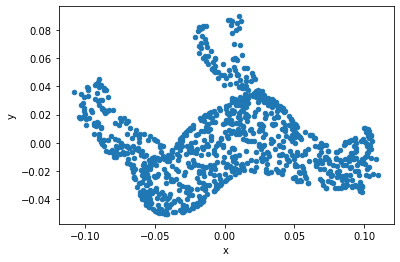

In [9]:
import pandas as pd
pd.set_option('display.max_columns', 6) # 지면에 맞게 출력
from sklearn.decomposition import PCA  
import seaborn   
from matplotlib import pyplot as plt 
from nlpia.data.loaders import get_data   

df = get_data('pointcloud').sample(1000)
pca = PCA(n_components=2) 
df2d = pd.DataFrame(pca.fit_transform(df) , columns = list('xy')) 
df2d.plot(kind='scatter', x='x',y='y') 
plt.show()

In [16]:
# nlp에 svd적용하기
# 실제 예제 : 5000개의 문자/스팸 구분
import pandas as pd 
from nlpia.data.loaders import get_data   
pd.options.display.width = 120 
sms = get_data('sms-spam') 
index  =  ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms.head(3)

,spam,text
0,0,"Go until jurong point, crazy.. Available only in bu..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkt...


In [15]:
sms.index = index 

sms.head(3)

,spam,text
sms0,0,"Go until jurong point, crazy.. Available only in bu..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup final tkt...


In [17]:
# 각 메시지의 tf-idf 벡터 계산
from sklearn.feature_extraction.text import TfidfVectorizer   
from nltk.tokenize.casual import casual_tokenize   
tfidf = TfidfVectorizer(tokenizer = casual_tokenize)  # 9232개의 서로 다른 1그램 토큰을 추출함
tfidf_docs = tfidf.fit_transform(raw_documents = sms.text).toarray()  ; tfidf_docs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
len(tfidf.vocabulary_)

9232

In [21]:
tfidf_docs = pd.DataFrame(tfidf_docs)  
tfidf_docs = tfidf_docs - tfidf_docs.mean()
tfidf_docs.shape

(4837, 9232)

In [20]:
sms.spam.sum() # 스팸은 총 638개

638

In [22]:
# 과대적합의 가능성이 보임 : 스팸필터가 적은수의 익숙한 단어들에만 의존하는것 
# 차원축소는 과대적합에 대한 주된 대응책이다. 수많은 단어를 그보다 적은수의 주제들로 통합함으로써 차원이 줄어들며, 결과적으로 nlp파이프라인이 좀더 일반화됨
 

In [23]:
# pca를 이용한 문자 메시지 잠재의미분석
# 9232차원의 tfidf벡터를 16차원의 주제벡터들로 줄이는데 pca모형을 사용
from sklearn.decomposition import PCA 

pca = PCA(n_components = 16) 
pca = pca.fit(tfidf_docs)  
pca_topic_vectors  =  pca.transform(tfidf_docs)   
columns = ['topic{}'.format(i) for i in range(pca.n_components)]  
pca_topic_vectors = pd.DataFrame(pca_topic_vectors  ,  columns = columns , index= index )   
pca_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,...,topic13,topic14,topic15
sms0,0.201,0.003,0.037,...,-0.036,-0.012,0.043
sms1,0.404,-0.094,-0.078,...,-0.020,0.055,-0.020
sms2!,-0.030,-0.048,0.090,...,-0.018,-0.042,0.063
sms3,0.329,-0.033,-0.035,...,-0.039,0.021,-0.087
sms4,0.002,0.031,0.038,...,0.030,-0.083,-0.016
sms5!,-0.016,0.059,0.014,...,0.070,-0.005,-0.030


In [24]:
tfidf.vocabulary_

{'go': 3807,
 'until': 8487,
 'jurong': 4675,
 'point': 6296,
 ',': 13,
 'crazy': 2549,
 '..': 21,
 'available': 1531,
 'only': 5910,
 'in': 4396,
 'bugis': 1973,
 'n': 5594,
 'great': 3894,
 'world': 8977,
 'la': 4811,
 'e': 3056,
 'buffet': 1971,
 '...': 25,
 'cine': 2277,
 'there': 8071,
 'got': 3855,
 'amore': 1296,
 'wat': 8736,
 'ok': 5874,
 'lar': 4848,
 'joking': 4642,
 'wif': 8875,
 'u': 8395,
 'oni': 5906,
 'free': 3604,
 'entry': 3195,
 '2': 471,
 'a': 1054,
 'wkly': 8933,
 'comp': 2386,
 'to': 8192,
 'win': 8890,
 'fa': 3328,
 'cup': 2608,
 'final': 3450,
 'tkts': 8180,
 '21st': 497,
 'may': 5272,
 '2005': 487,
 '.': 15,
 'text': 8020,
 '87121': 948,
 'receive': 6688,
 'question': 6574,
 '(': 9,
 'std': 7651,
 'txt': 8379,
 'rate': 6628,
 ')': 10,
 't': 7889,
 '&': 7,
 "c's": 2020,
 'apply': 1383,
 '08452810075': 115,
 'over': 6003,
 '18': 438,
 "'": 8,
 's': 6959,
 'dun': 3041,
 'say': 7034,
 'so': 7438,
 'early': 3069,
 'hor': 4207,
 'c': 2019,
 'already': 1268,
 'then': 

In [25]:
column_nums, terms  =  zip(*sorted(zip(tfidf.vocabulary_.values(), tfidf.vocabulary_.keys())))

In [26]:
terms

('!',
 '"',
 '#',
 '#150',
 '#5000',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '. .',
 '. . .',
 '. . . .',
 '. . . . .',
 '. ..',
 '..',
 '.. .',
 '.. . . .',
 '.. ... ...',
 '...',
 '... . . . .',
 '/',
 '0',
 '00',
 '00870405040',
 '0089',
 '01',
 '0121 2025050',
 '01223585236',
 '01223585334',
 '01256987',
 '02',
 '02/06',
 '02/09',
 '0207 153 9153',
 '0207 153 9996',
 '0207-083-6089',
 '02072069400',
 '02073162414',
 '02085076972',
 '03',
 '03530150',
 '04',
 '04/09',
 '05',
 '050703',
 '06',
 '06.05',
 '06/11',
 '07/11',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '0800 0721072',
 '

In [27]:
weights = pd.DataFrame(pca.components_, columns= terms, index =['topic{}'.format(i) for i in range(16)] )

In [32]:
pd.options.display.max_columns = 20
weights.head(4).round(3)

,!,"""",#,#150,#5000,$,%,&,',(,...,ü'll,–,—,‘,’,“,…,┾,〨ud,鈥
topic0,-0.071,0.008,-0.001,-0.000,-0.001,0.003,-0.000,-0.012,-0.007,-0.005,...,0.003,-0.000,-0.0,-0.004,-0.001,-0.001,-0.002,0.001,0.001,0.001
topic1,0.064,0.008,0.000,-0.000,-0.001,-0.001,-0.002,-0.016,-0.016,0.001,...,0.002,0.001,-0.0,0.004,-0.001,-0.001,0.003,0.001,0.001,0.001
topic2,0.071,0.027,0.000,0.001,0.002,0.000,0.001,0.059,0.008,0.019,...,0.000,0.001,-0.0,0.002,0.000,0.001,0.002,-0.001,-0.001,-0.001
topic3,-0.059,-0.032,-0.001,-0.000,-0.001,0.001,-0.003,-0.028,0.001,-0.010,...,-0.001,-0.001,0.0,0.000,-0.000,-0.000,0.001,0.001,0.001,0.001


In [34]:
deals =  weights['! ;) :) half off free crazy deal only $ 80 %'.split()].round(3) *100 

In [35]:
deals

,!,;),:),half,off,free,crazy,deal,only,$,80,%
topic0,-7.1,0.1,-0.5,-0.0,-0.4,-2.0,-0.0,-0.1,-2.2,0.3,-0.0,-0.0
topic1,6.4,0.0,7.4,0.1,0.4,-2.3,-0.2,-0.1,-3.8,-0.1,-0.0,-0.2
topic2,7.1,0.2,-0.1,0.0,0.3,4.4,0.1,-0.1,0.7,0.0,0.0,0.1
topic3,-5.9,-0.3,-7.0,0.2,0.3,-0.2,0.0,0.1,-2.3,0.1,-0.1,-0.3
topic4,38.1,-0.1,-12.4,-0.1,-0.2,9.9,0.1,-0.2,3.0,0.3,0.1,-0.1
topic5,-26.5,0.1,-1.6,-0.3,-0.7,-1.4,-0.6,-0.2,-1.8,-0.9,0.0,0.0
topic6,-10.9,-0.5,19.8,-0.4,-0.9,-0.6,-0.2,-0.1,-1.4,-0.0,-0.0,-0.1
topic7,16.2,0.1,-17.9,0.8,0.8,-2.7,0.0,0.0,-1.9,-0.3,0.0,-0.1
topic8,34.9,0.1,4.5,-0.5,-0.6,-0.0,-0.4,-0.4,3.3,-0.6,-0.0,-0.2
topic9,6.9,-0.3,17.1,1.5,-0.9,6.4,-0.5,-0.4,3.1,-0.5,-0.0,0.0


In [37]:
deals.T.sum()  # 4,8,9가 거래관련 스팸일거라 예상 가능함
# pca는 9232개의 단어 빈도들의 부난이 가장 커지는 조합을 찾음, 사람이 보기에는 전혀 다른 여러 주제의 여러단어가 하나의 차원으로 합쳐지는 일이 발생


topic0    -11.9
topic1      7.6
topic2     12.7
topic3    -15.4
topic4     38.4
topic5    -33.9
topic6      4.7
topic7     -5.0
topic8     40.1
topic9     32.4
topic10   -29.1
topic11    50.3
topic12    13.9
topic13    47.0
topic14    20.7
topic15   -13.5
dtype: float64

In [39]:
# 절단되 svd를 이용한 문자 메시지 잠재 의미 분석
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components = 16, n_iter =100) # 16개의 주제를 산출하되 pca만큼 정확한 결과를 얻기위해 자료를 100번 반복해서 처리


In [40]:
tfidf_docs.values

array([[-2.56432277e-02, -5.84019981e-03, -2.28435274e-04, ...,
        -5.48526215e-05, -5.48526215e-05, -5.48526215e-05],
       [-2.56432277e-02, -5.84019981e-03, -2.28435274e-04, ...,
        -5.48526215e-05, -5.48526215e-05, -5.48526215e-05],
       [-2.56432277e-02, -5.84019981e-03, -2.28435274e-04, ...,
        -5.48526215e-05, -5.48526215e-05, -5.48526215e-05],
       ...,
       [-2.56432277e-02, -5.84019981e-03, -2.28435274e-04, ...,
        -5.48526215e-05, -5.48526215e-05, -5.48526215e-05],
       [-2.56432277e-02, -5.84019981e-03, -2.28435274e-04, ...,
        -5.48526215e-05, -5.48526215e-05, -5.48526215e-05],
       [-2.56432277e-02, -5.84019981e-03, -2.28435274e-04, ...,
        -5.48526215e-05, -5.48526215e-05, -5.48526215e-05]])

In [41]:
svd_topic_vectors = svd.fit_transform(tfidf_docs.values)

In [44]:
svd_topic_vectors = pd.DataFrame(svd_topic_vectors, columns= columns, index=index) 

In [45]:
svd_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.201,0.003,0.037,0.011,-0.019,-0.053,0.039,-0.066,0.012,-0.083,0.007,-0.007,0.002,-0.036,-0.014,0.037
sms1,0.404,-0.094,-0.078,0.051,0.100,0.047,0.023,0.065,0.023,-0.024,-0.004,0.036,0.043,-0.021,0.051,-0.042
sms2!,-0.030,-0.048,0.090,-0.067,0.091,-0.043,-0.000,-0.001,-0.057,0.051,0.125,0.023,0.026,-0.020,-0.042,0.052
sms3,0.329,-0.033,-0.035,-0.016,0.052,0.056,-0.166,-0.074,0.063,-0.108,0.022,0.023,0.073,-0.046,0.022,-0.070
sms4,0.002,0.031,0.038,0.034,-0.075,-0.093,-0.044,0.061,-0.045,0.029,0.028,-0.009,0.027,0.034,-0.083,-0.021
sms5!,-0.016,0.059,0.014,-0.006,0.122,-0.040,0.005,0.167,-0.023,0.064,0.041,0.055,-0.037,0.075,-0.001,0.020


In [46]:
# 산출한 벡터들이 pca모형이 산출한 것들과 정확히 일치 
# 반복횟수를 크게 잡았고, 각 단어의 tf-idf빈도들을 0에 대해 중심화한 덕분


In [47]:
# 스팸분류에 대한 lsa의 정확도
import numpy as np  
svd_topic_vectors = (svd_topic_vectors.T / np.linalg.norm(svd_topic_vectors, axis=1)).T 

In [48]:
svd_topic_vectors

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.815339,0.011229,0.150911,0.044478,-0.077920,-0.214706,0.158655,-0.265822,0.048434,-0.334490,0.030397,-0.029076,0.010069,-0.144022,-0.055770,0.149626
sms1,0.888956,-0.206368,-0.170397,0.111870,0.219957,0.103543,0.050283,0.142806,0.050673,-0.052748,-0.009661,0.078080,0.095108,-0.045777,0.111280,-0.092359
sms2!,-0.131376,-0.207488,0.389017,-0.289237,0.391411,-0.186100,-0.001226,-0.004307,-0.245876,0.221588,0.541174,0.100243,0.110209,-0.087526,-0.183288,0.225754
sms3,0.778228,-0.077499,-0.081756,-0.037400,0.123524,0.131796,-0.391606,-0.175440,0.147886,-0.254562,0.051789,0.054281,0.171660,-0.108844,0.052625,-0.164697
sms4,0.011327,0.161933,0.201076,0.177766,-0.391843,-0.485564,-0.229397,0.321560,-0.234242,0.150988,0.147053,-0.045737,0.140988,0.177142,-0.438170,-0.107920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sms4832!,-0.258607,-0.327030,0.186161,-0.152079,0.398326,0.210249,-0.329410,0.039892,0.193684,-0.234405,-0.113023,0.073043,0.254455,-0.183272,0.489593,0.082544
sms4833,0.208962,0.230708,0.010256,-0.188276,-0.092476,0.137350,-0.054067,-0.236280,-0.263342,0.472585,0.212953,0.067743,-0.239005,0.024633,-0.055658,0.614764
sms4834,0.383772,0.216981,-0.097046,0.298546,0.082005,-0.044816,-0.119424,-0.111154,-0.308067,-0.352788,-0.384167,-0.452152,0.017510,0.288414,0.103322,-0.078645
sms4835,-0.149449,0.033859,0.004042,-0.075757,-0.337570,-0.514506,-0.143665,0.170049,-0.570358,0.192602,0.110736,0.166365,-0.018017,-0.209168,0.145450,-0.273790


In [49]:
svd_topic_vectors.iloc[:10].dot(svd_topic_vectors.iloc[:10].T).round(1)

,sms0,sms1,sms2!,sms3,sms4,sms5!,sms6,sms7,sms8!,sms9!
sms0,1.0,0.6,-0.1,0.6,-0.0,-0.3,-0.3,-0.1,-0.3,-0.3
sms1,0.6,1.0,-0.2,0.8,-0.2,0.0,-0.2,-0.2,-0.1,-0.1
sms2!,-0.1,-0.2,1.0,-0.2,0.1,0.4,0.0,0.3,0.5,0.4
sms3,0.6,0.8,-0.2,1.0,-0.2,-0.3,-0.1,-0.3,-0.2,-0.1
sms4,-0.0,-0.2,0.1,-0.2,1.0,0.2,0.0,0.1,-0.4,-0.2
sms5!,-0.3,0.0,0.4,-0.3,0.2,1.0,-0.1,0.1,0.3,0.4
sms6,-0.3,-0.2,0.0,-0.1,0.0,-0.1,1.0,0.1,-0.2,-0.2
sms7,-0.1,-0.2,0.3,-0.3,0.1,0.1,0.1,1.0,0.1,0.4
sms8!,-0.3,-0.1,0.5,-0.2,-0.4,0.3,-0.2,0.1,1.0,0.3
sms9!,-0.3,-0.1,0.4,-0.1,-0.2,0.4,-0.2,0.4,0.3,1.0
